# Project: Investigating gapminder data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#loadinspect">Load and inspect data</a></li>
        <li><a href="#compare">Compare number of countries</a></li>
        <li><a href="#dropping">Drop unneeded rows and columns</a></li>
        <li><a href="#missing">Handle missing data</a></li>
        <ul>
            <li><a href="#missingco2">Fix missing values in CO2 data</a></li>
            <li><a href="#missinglife">Fix missing values in Life Expectancy data</a></li>
            <li><a href="#missingagr">Fix missing values in Agricultural Area data</a></li>
        </ul>
        <li><a href="#checking">Check datatypes and duplicates</a></li>
        <li><a href="#reshape">Reshaping data</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#appendix">Appendix</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>Explain variables


### Questions

- <a href="#q1">Which world regions have the highest/lowest CO2 emissions and how<br>
do they relate to the population?</a>
- How does population development relate to life expectancy in different parts of the world?
- How do CO2 emissions relate to the average life expectancy of a country?
- How do CO2 emissions relate to the Agricultural Area of world regions?

### Variables
#### Numerical

- **Total population:** per year and country, 1950–2100
- **CO2-emissions:** in tonnes per person per year and country, 1950–1918
- **Life Expectancy:** in years per year and country, 1950–2100
- **Agricultural Area:** in % of total surface area per year and country, 1961–2018

#### Categorical
- 192 **countries**
- 22 **regions**
- 5 **continents**

In [1723]:
#% of world pop for country/region/continent, which regions grow, which regions shrink, is there a pattern
#life expectancy: how much difference between 1950 and 1918, what change is expected until 2100 ->
#worldwide, by continent, EU, region
#then look at relationship pop/life expectancy
#

In [1724]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#run python file with helper functions
%run helpers.py

#render plots in the notebook
%matplotlib inline
#set style for all plots
plt.style.use('ggplot');

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
<a id='loadinspect'></a>
### Load and inspect data

In this section, I will inspect the different datasets individually\
to familiarize myself with them and prepare them for the following analysis.

In [1725]:
#load population over time dataset
pop = pd.read_csv('./gapminder_data/population_total.csv')
display(pop.info())
display(pop.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


None

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M


In [1726]:
#load dataset with CO2 emissions per country over time
co2 = pd.read_csv('./gapminder_data/co2_emissions_tonnes_per_person.csv')
display(co2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2018
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


None

In [1727]:
display(co2.head(3))

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590


In [1728]:
#load data for agricultural area in %
agri_area = pd.read_csv('./gapminder_data/agricultural_land_percent_of_land_area.csv')
display(agri_area.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Columns: 59 entries, country to 2018
dtypes: float64(58), object(1)
memory usage: 97.4+ KB


None

In [1729]:
display(agri_area.head(3))

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,...,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1
1,Afghanistan,57.7,57.8,57.9,58.0,58.0,58.1,58.2,58.2,58.2,...,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1
2,Angola,45.9,45.9,45.9,45.9,45.9,46.0,46.0,46.0,46.0,...,41.7,42.1,42.6,43.0,43.5,43.9,44.3,44.8,45.2,45.7


In [1730]:
#load data for life ecpectancy
life_exp = pd.read_csv('./gapminder_data/life_expectancy_years.csv')
display(life_exp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


None

In [1731]:
display(life_exp.head(3))

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4


<a id='compare'></a>
### Compare number of countries
The number of countries is different in each dataset.</br>
So this section is about finding out which and how many</br>
countries do not appear in all of the datasets.

In [1732]:
#save datasets and names for iterations
datasets = [pop, co2, life_exp, agri_area]
names = ['Population', 'CO2', 'Life Expectancy', 'Agricultural Area']
  
#compare countries
get_num_countries(datasets, names)

Number of countries in Population: 197
Number of countries in CO2: 194
Number of countries in Life Expectancy: 195
Number of countries in Agricultural Area: 211


In [1733]:
#save country columns as sets and
#look at the difference
sets = [set(ds.country) for ds in datasets]
combined_diff = []

import itertools

#compare each set with all others
for x, y in itertools.combinations(sets, 2):
    combined_diff += x.difference(y)
    combined_diff += y.difference(x)
    
combined_diff = sorted(set(combined_diff))
print(combined_diff)
print(len(combined_diff))

['American Samoa', 'Aruba', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Faeroe Islands', 'French Polynesia', 'Greenland', 'Guam', 'Holy See', 'Isle of Man', 'Kosovo', 'Liechtenstein', 'Monaco', 'New Caledonia', 'Northern Mariana Islands', 'Puerto Rico', 'San Marino', 'Taiwan', 'Turks and Caicos Islands', 'Virgin Islands (U.S.)']
22


<a id='dropping'></a>
### Drop unneeded rows and columns

There are 22 countries that do not appear in all datasets.<br/>
Since all of them are very small and sparsely populated,<br/>
I drop these rows from the datasets.

In [1734]:
for ds in datasets:
    #get indexes of rows to drop
    to_drop = ds[ds['country'].isin(combined_diff)].index
    #drop rows accordingly
    ds.drop(to_drop, axis=0, inplace=True)

#check if number of countries matches now
get_num_countries(datasets, names)          

Number of countries in Population: 192
Number of countries in CO2: 192
Number of countries in Life Expectancy: 192
Number of countries in Agricultural Area: 192


Now that I have the same countries in all the datasets, I also<br/>
want to look at the same timeframes in all of them, if possible.</br>
I will look only at data after 1949, so I drop the columns for earlier years.

In [1735]:
#drop data from 1800 to 1949 from all datasets,
#except Agricultural Area, which only starts in 1961
[val.drop(val.loc[:, '1800':'1949'], axis=1, inplace=True) for i, val in enumerate(datasets) if names[i] != 'Agricultural Area'];

<a id='checking'></a>
### Check  datatypes and duplicates

All 152 columns in the Population data are of object type,</br>
which is not what I want because for plotting and exploring</br>
numerical data is needed. This will be handled in this section.</br>
The columns with numerical data in CO2, Agricultural Area and </br>
Life Expectancy are all floats, so nothing has to be fixed here. </br>
None of the datasets contain any duplicated rows.

In [1736]:
for i, val in enumerate(datasets):
    print(names[i])
    print(list(val.dtypes.unique()))
    if pop.duplicated().any():
        print('There are duplicates in {}.\n'.format(names[i]))
    else:
        print('There are no duplicates in {}.\n'.format(names[i]))

Population
[dtype('O')]
There are no duplicates in Population.

CO2
[dtype('O'), dtype('float64')]
There are no duplicates in CO2.

Life Expectancy
[dtype('O'), dtype('float64')]
There are no duplicates in Life Expectancy.

Agricultural Area
[dtype('O'), dtype('float64')]
There are no duplicates in Agricultural Area.



#### Fix datatypes in Population data
In this section I remove the suffixes 'M', 'k' and 'B' from the numbers and then</br>
convert the datatype from object(string) to float using `pd.to_numeric()` with a <a href="#cf">custom function</a>.

In [1737]:
#check population data
pop.info()
pop.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 196
Columns: 152 entries, country to 2100
dtypes: object(152)
memory usage: 229.5+ KB


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.75M,7.84M,7.94M,8.04M,8.15M,8.27M,8.4M,8.54M,8.68M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,4.55M,4.62M,4.71M,4.82M,4.94M,5.04M,5.14M,5.23M,5.31M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,1.26M,1.29M,1.32M,1.35M,1.38M,1.42M,1.46M,1.5M,1.54M,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M


In [1738]:
#save column names except 'country'
labels = list(pop.columns[1:])

#remove suffixes and convert to float
for val in labels:
    pop[val] = pop[val].apply(cut_suffix_tonumber)

In [1739]:
#verify type conversion
pop.info()
pop.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 196
Columns: 152 entries, country to 2100
dtypes: float64(151), object(1)
memory usage: 229.5+ KB


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7750000.0,7840000.0,7940000.0,8040000.0,8150000.0,8270000.0,8400000.0,8540000.0,8680000.0,...,76600000.0,76400000.0,76300000.0,76100000.0,76000000.0,75800000.0,75600000.0,75400000.0,75200000.0,74900000.0
1,Angola,4550000.0,4620000.0,4710000.0,4820000.0,4940000.0,5040000.0,5140000.0,5230000.0,5310000.0,...,168000000.0,170000000.0,172000000.0,175000000.0,177000000.0,179000000.0,182000000.0,184000000.0,186000000.0,188000000.0
2,Albania,1260000.0,1290000.0,1320000.0,1350000.0,1380000.0,1420000.0,1460000.0,1500000.0,1540000.0,...,1330000.0,1300000.0,1270000.0,1250000.0,1220000.0,1190000.0,1170000.0,1140000.0,1110000.0,1090000.0


<a id='missing'></a>
### Handle missing data

An overview shows that there are no missing values in the population dataset,</br>
but there are several in the CO2, Forest Area and Life expectancy datasets.</br>
They will be fixed in the next sections.

In [1740]:
#check for NaN values
for i, val in enumerate(datasets):
    filtered = get_missing(val)[0]
    #output num of missing values
    display('Number of missing values per country in {}: {}'.format(names[i], [x for x in filtered.values]))
    display('Number of countries with missing values in {}: {}'.format(names[i], len([x for x in filtered.values])))

/Users/irene/Documents/udacity/DataAnalyst/DataAnalysisProject/gapminder_project/helpers.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  #filter for values < 0


'Number of missing values per country in Population: []'

'Number of countries with missing values in Population: 0'

'Number of missing values per country in CO2: [40, 9, 7, 9, 8, 8, 9, 20, 22, 9, 8, 9, 9, 1, 44, 9, 42, 9, 8, 9, 5, 11, 31, 5, 40, 9, 21, 42, 9, 9, 9, 9, 9, 9, 41, 8, 14, 14, 42, 40, 9, 8, 7, 2, 9, 9, 1, 9, 2, 13, 9, 52, 40, 5, 12, 9, 9]'

'Number of countries with missing values in CO2: 57'

'Number of missing values per country in Life Expectancy: [81, 81, 81, 81, 81, 81, 81]'

'Number of countries with missing values in Life Expectancy: 7'

'Number of missing values per country in Agricultural Area: [31, 31, 31, 31, 32, 32, 31, 30, 31, 31, 31, 31, 31, 39, 31, 31, 30, 31, 45, 30, 2, 31, 50, 45, 50, 32, 31, 31, 31, 31, 31]'

'Number of countries with missing values in Agricultural Area: 31'

<a id='missingco2'></a>
#### Fix missing values in CO2 data
A bar chart of the missing values in CO2 shows that there are quite a lot,</br>
so I don't want to drop the affected rows or replace the values with 0. 
</br>Instead I use the pandas `fillna()` function to impute the missing </br>
values with the mean (rounded to 4 decimal places to match the existing values).

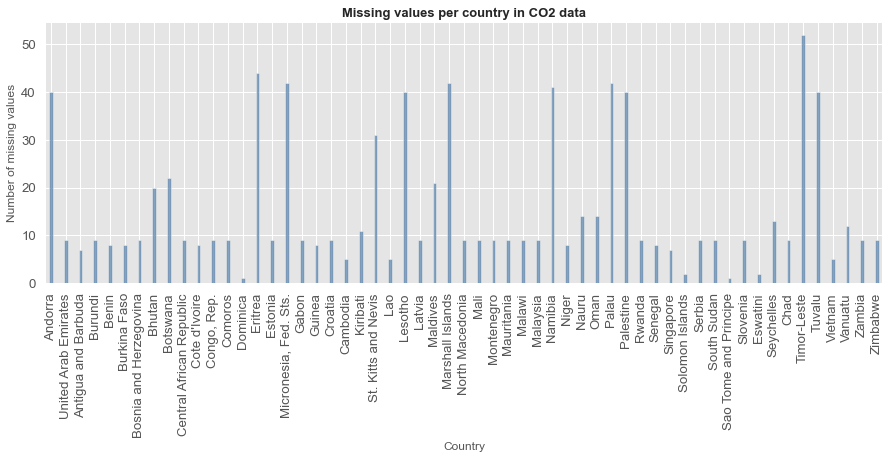

In [1741]:
#set chart size
plt.figure(figsize=(15, 4.8))

#create bar chart
x_val, x_lab = get_missing(co2)
plot_missing(co2, x_val, x_lab, 'CO2')

In [1742]:
#replace missing with mean
#parameter numeric_only=True to get rid of a Future Warning
co2.fillna(round(co2.mean(numeric_only=True), 4), inplace=True)

In [1743]:
#verify that there are no more missing values
co2.isna().sum().any()

False

<a id='missinglife'></a>
#### Fix missing values in Life Expectancy data
The bar chart shows that 7 countries have 81 missing values each.

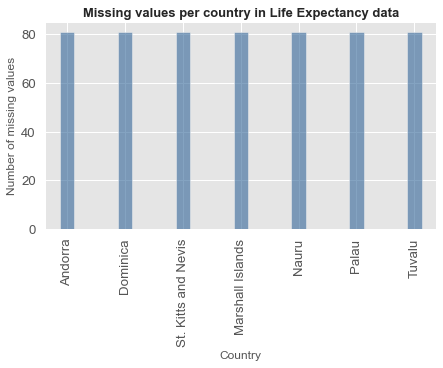

In [1744]:
#set chart size
plt.figure(figsize=(7, 3.8))

#create bar chart
x_val, x_lab = get_missing(life_exp)
plot_missing(co2, x_val, x_lab, 'Life Expectancy')

In this case looking at the DataFrame makes it clearer than a chart that</br>
apparently those 7 countries are missing all the predicted future values</br>
(the future at the time the dataset was created), which won't be needed.</br>
I use pandas `fillna()` function to replace the NaN values with the mean.

In [1745]:
life_exp[life_exp['country'].isin(x_lab)].loc[:,'2018':].head(3)

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
3,82.1,82.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,72.3,72.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,72.1,72.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1746]:
#replace missing values with 0
life_exp.fillna(round(life_exp.mean(numeric_only=True), 4), inplace=True)

#verify that there are no more missing values 
life_exp.isna().sum().any()

False

<a id='missingagr'></a>
#### Fix missing values in Agricultural Area data
After plotting a chart and inspecting the missing values in the DataFrame,</br> 
it is apparent that the missing values appear only before 1992.</br>
Again the missing values are imputed with `fillna()` function using the</br>
'backfill'-method, which uses the next non-null value to fill the gaps.

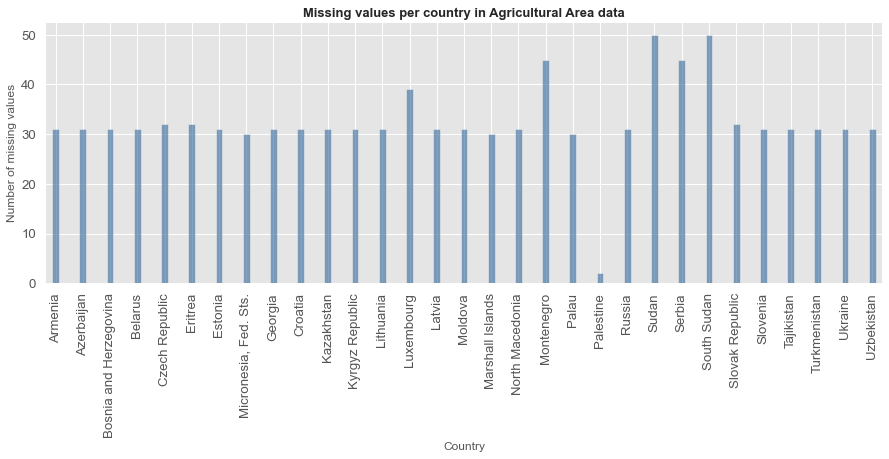

In [1747]:
#set chart size
plt.figure(figsize=(15, 4.8))

#create bar chart
x_val, x_lab = get_missing(agri_area)
plot_missing(co2, x_val, x_lab, 'Agricultural Area')

In [1748]:
agri_area[agri_area['country'].isin(x_lab)].loc[:,:'1995'].head(3)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.1,41.5,42.1,43.7
12,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.4,53.6,53.9,53.9
21,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,42.8,42.6,42.5


In [1749]:
#replace missing with next values
agri_area.fillna(method='backfill', axis=0, inplace=True)

In [1750]:
#verify that there are no more missing values
agri_area.isna().sum().any()

False

<a id='reshape'></a>
### Reshaping Data
To unite all datasets into one dataframe, the data is first converted </br>
from wide to long format and then merged together with an outer join. </br>
The years are not column labels anymore, so they can be converted to </br>
datetime format and resampled with a frequency of a decade to reduce </br>
the number of datapoints.


In [1751]:
#convert datasets to long format
pop_melted = pd.melt(pop, id_vars=['country'], var_name='year', value_name='population')

co2_melted = pd.melt(co2, id_vars=['country'], var_name='year', value_name='co2')

agri_melted = pd.melt(agri_area, id_vars=['country'], var_name='year', value_name='agr_area')

life_exp_melted = pd.melt(life_exp, id_vars=['country'], var_name='year', value_name='life_exp')

In [1753]:
#join the melted data together
df_merged = pop_melted.merge(co2_melted, on=['country','year'], how='outer')\
                    .merge(agri_melted, on=['country','year'], how='outer')\
                    .merge(life_exp_melted, on=['country','year'], how='outer')

In [1754]:
df_merged.describe()

,population,co2,agr_area,life_exp
count,2.899200e+04,13248.000000,11136.000000,28992.000000
mean,3.931644e+07,4.143421,38.536247,72.008662
std,1.366452e+08,6.776490,22.287531,11.783865
min,3.430000e+02,0.000000,0.263000,9.500000
25%,1.700000e+06,0.378000,20.000000,65.700000
50%,7.380000e+06,1.900000,39.200000,73.900000
75%,2.850000e+07,5.520000,56.100000,80.800000
max,1.650000e+09,101.000000,93.400000,94.400000


In [1756]:
#add continent and region information
continents = pd.read_csv('./gapminder_data/continents.csv', sep='\t', header=None,\
                         usecols=[1,4,6], names=['country', 'region', 'continent'])
display(continents.head())
print(sorted(continents.region.unique()))
len(continents.region.unique())

,country,region,continent
0,Afghanistan,Southern Asia,Asia
1,Åland Islands,Northern Europe,Europe
2,Albania,Southern Europe,Europe
3,Algeria,Northern Africa,Africa
4,American Samoa,Polynesia,Oceania


['Antarctica', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Melanesia', 'Micronesia', 'Middle Africa', 'Northern Africa', 'Northern America', 'Northern Europe', 'Polynesia', 'South America', 'South-eastern Asia', 'Southern Africa', 'Southern Asia', 'Southern Europe', 'Western Africa', 'Western Asia', 'Western Europe']


23

In [1757]:
df_merged = df_merged.merge(continents, on='country', how='left')
df_merged.tail()

,country,year,population,co2,agr_area,life_exp,region,continent
28987,Samoa,2100,310000.0,NaN,NaN,80.8,Polynesia,Oceania
28988,Yemen,2100,53200000.0,NaN,NaN,78.0,Western Asia,Asia
28989,South Africa,2100,79200000.0,NaN,NaN,77.7,Southern Africa,Africa
28990,Zambia,2100,81500000.0,NaN,NaN,77.1,Eastern Africa,Africa
28991,Zimbabwe,2100,31000000.0,NaN,NaN,74.4,Eastern Africa,Africa


In [1758]:
#convert 'year' column to datetime
df_merged['year'] = pd.to_datetime(df_merged['year'])
#verify datatype conversion
assert df_merged['year'].dtype == 'datetime64[ns]'

In [1759]:
df_grouped = df_merged.groupby(['continent', 'region', 'country', 'year'], as_index=False)\
                            [['co2', 'population', 'agr_area', 'life_exp']].mean()
#add column for absolute CO2 emissions
df_grouped['co2_abs'] = df_grouped['co2'] * df_grouped['population']
df_grouped

,continent,region,country,year,co2,population,agr_area,life_exp,co2_abs
0,Africa,Eastern Africa,Burundi,1950-01-01,1.9846,2310000.0,NaN,40.2,4584426.0
1,Africa,Eastern Africa,Burundi,1951-01-01,2.0521,2360000.0,NaN,40.5,4842956.0
2,Africa,Eastern Africa,Burundi,1952-01-01,2.0289,2410000.0,NaN,40.8,4889649.0
3,Africa,Eastern Africa,Burundi,1953-01-01,2.0452,2450000.0,NaN,41.0,5010740.0
4,Africa,Eastern Africa,Burundi,1954-01-01,2.2188,2490000.0,NaN,41.5,5524812.0
...,...,...,...,...,...,...,...,...,...
24910,South America,South America,Uruguay,2096-01-01,NaN,3240000.0,NaN,87.3,NaN
24911,South America,South America,Uruguay,2097-01-01,NaN,3220000.0,NaN,87.5,NaN
24912,South America,South America,Uruguay,2098-01-01,NaN,3210000.0,NaN,87.6,NaN
24913,South America,South America,Uruguay,2099-01-01,NaN,3200000.0,NaN,87.7,NaN


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

<a id="q1"></a>
### Which world regions have the highest/lowest CO2 emissions?  

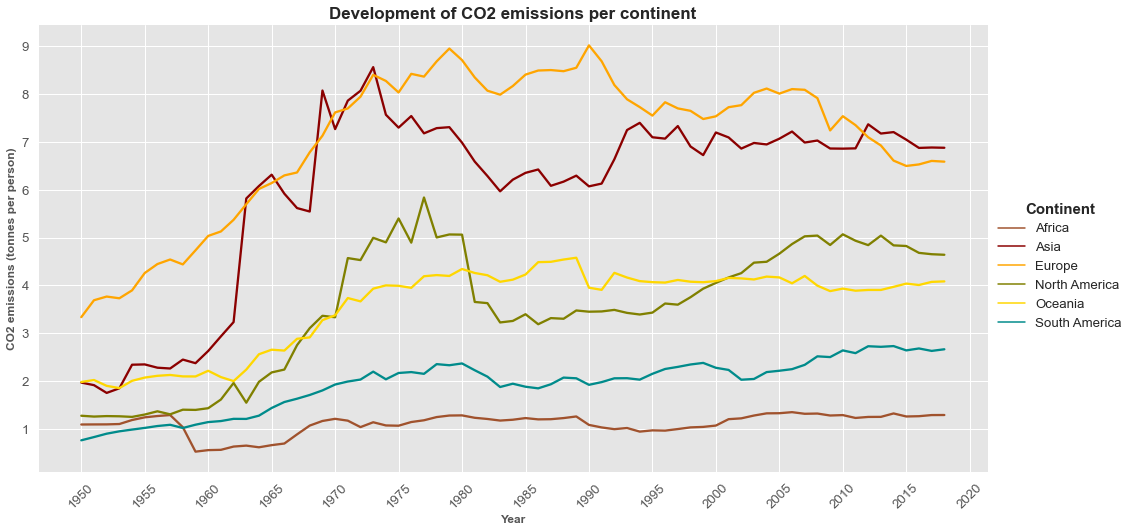

In [1788]:
#import modules for manipulating ticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

#set colors to be used for lines
cp = ["sienna", "darkred", "orange", "olive", "gold", "darkcyan"]
sns.set_palette(cp)

#plot overview of development of co2 emissions per continent
g = sns.relplot(x="year", y="co2", hue="continent", kind="line", \
                data=df_grouped, height=7, aspect=16/8, linewidth=2.3, \
                ci=None, facet_kws={'legend_out': True})

#get axes object
ax = g.axes
#set xticks to 5 year interval
ax[0,0].xaxis.set_major_locator(mdates.YearLocator(5))
#set yticks to interval of 1
ax[0,0].yaxis.set_major_locator(ticker.MultipleLocator(1))

#labels
plt.xticks(rotation=45)
plt.xlabel('Year', fontweight='heavy')
plt.ylabel('CO2 emissions (tonnes per person)', fontweight='heavy')
plt.title('Development of CO2 emissions per continent', fontsize=17, fontweight='heavy')
g._legend.set_title('Continent', prop={'weight':'bold', 'size':15})

#### Comparison of CO2 emissions per region in the 1950s, 1990s and 2010s</br>


In [1761]:
#group countries and resample dates to a frequency of 5 years
df_merged_resampled = df_merged.groupby(['continent', 'region', 'country']).resample('5A', on='year').mean()
df_merged_resampled.head()

population      co2  agr_area  \
continent region         country year                                        
Africa    Eastern Africa Burundi 1950-12-31   2310000.0  1.98460       NaN   
                                 1955-12-31   2450000.0  2.13174       NaN   
                                 1960-12-31   2690000.0  1.42266       NaN   
                                 1965-12-31   2968000.0  0.01512     62.28   
                                 1970-12-31   3330000.0  0.01710     68.08   

                                             life_exp  
continent region         country year                  
Africa    Eastern Africa Burundi 1950-12-31     40.20  
                                 1955-12-31     41.14  
                                 1960-12-31     43.06  
                                 1965-12-31     44.72  
                                 1970-12-31     45.68

In [1762]:
#save 'year' index values 
years = df_merged_resampled.index.get_level_values('year')
years

#get data for decade 2010–2020
ten = df_merged_resampled.loc[years =='2010-12-31'].groupby('region')[['co2', 'population']].mean()
ten_rel = twenty['co2']
ten_abs = twenty['co2'] * twenty['population']

#get data for decade 1990–2000
ninety = df_merged_resampled.loc[years =='1990-12-31'].groupby('region')[['co2', 'population']].mean()
ninety_rel = ninety['co2']
ninety_abs = ninety['co2'] * ninety['population']

#get data for decade 1950–1960
fifty = df_merged_resampled.loc[years =='1950-12-31'].groupby('region')[['co2', 'population']].mean()
fifty_rel = fifty['co2']
fifty_abs = fifty['co2'] * fifty['population']

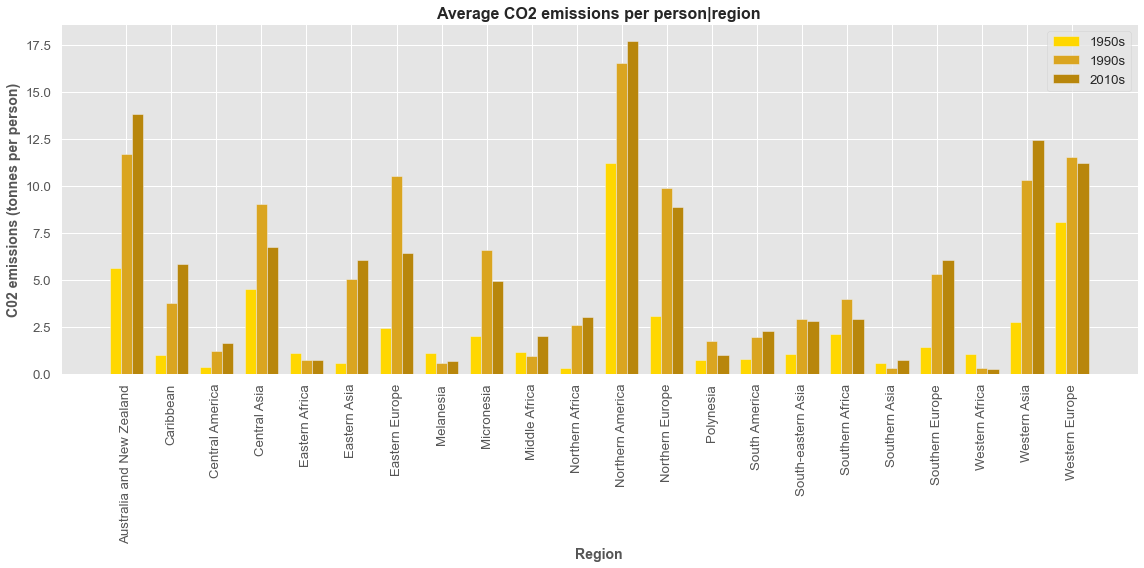

In [1763]:
#plot means of co2 per person
fig,ax = plt.subplots(figsize=(16,8))
width = 0.25
x = np.arange(len(fifty))

ax.bar(x=x, height=fifty_rel, width=width, label='1950s', color='gold')
ax.bar(x=x+width, height=ninety_rel, width=width, label='1990s', color='goldenrod')
ax.bar(x=x+width*2, height=ten_rel, width=width, label='2010s', color='darkgoldenrod')

locations = x+width
labels = sorted(df_merged_resampled.index.get_level_values('region').unique())
plt.xticks(ticks=locations, labels=labels, rotation=90)
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('C02 emissions (tonnes per person)', fontsize=14, fontweight='bold')
plt.title('Average CO2 emissions per person|region', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()

#### Top 10 regions with highest emissions per person

In [1764]:
display(ten.sort_values(by=['co2'], ascending = False).head(10))

,co2,population
region,,
Northern America,17.080000,3.330000e+07
Australia and New Zealand,13.696000,1.280900e+07
Western Asia,12.199050,1.232398e+07
Western Europe,10.869143,2.673117e+07
Northern Europe,8.845556,4.030267e+06
Central Asia,7.248450,1.392500e+07
Eastern Asia,6.547333,4.950780e+08
Eastern Europe,6.544333,2.206367e+07
Caribbean,6.378920,3.532876e+06


#### Top 10 regions with lowest emissions per person

In [1765]:
display(ten.sort_values(by=['co2']).head(10))

,co2,population
region,,
Western Africa,0.280513,1.934471e+07
Melanesia,0.683100,2.137800e+06
Eastern Africa,0.735349,1.636464e+07
Southern Asia,0.805148,1.989470e+08
Polynesia,1.028733,9.896667e+04
Central America,1.693475,1.910785e+07
Middle Africa,1.914803,8.431371e+06
South America,2.448800,3.468462e+07
South-eastern Asia,2.802575,6.121350e+07


#### Comparison of absolute CO2 emissions per region
If we look at the absolute values, Eastern Asia, Northern America and </br>
Western Europe stand out as the regions which have the most co2 emissions.</br> 
It looks like we won't get climate change under control without the help of China.

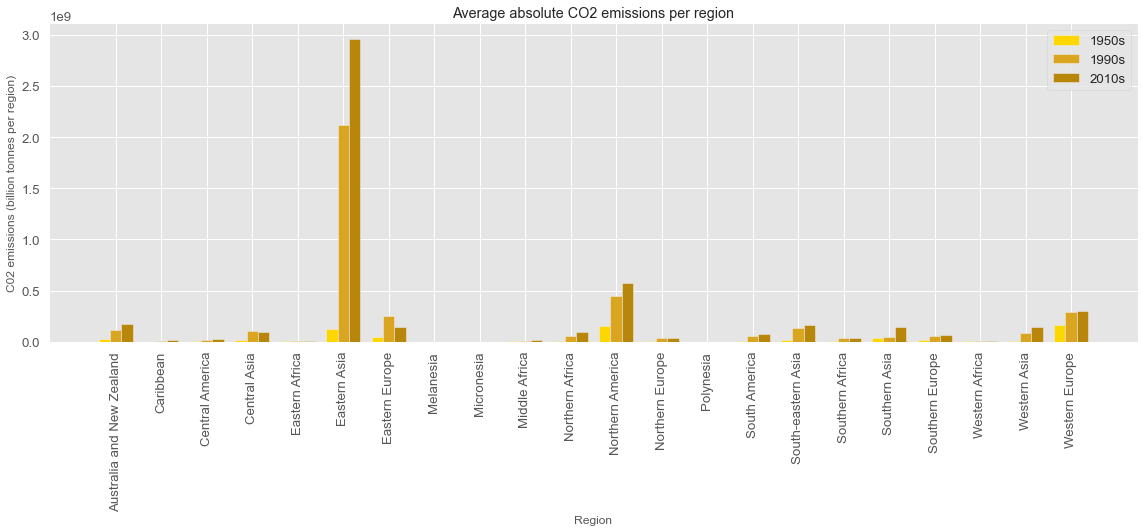

In [1766]:
fig,ax = plt.subplots(figsize=(16,7.5))
width = 0.25
x = np.arange(len(fifty))

ax.bar(x=x, height=fifty_abs, width=width, label='1950s', color='gold')
ax.bar(x=x+width, height=ninety_abs, width=width, label='1990s', color='goldenrod')
ax.bar(x=x+width*2, height=ten_abs, width=width, label='2010s', color='darkgoldenrod')

locations = x+width
labels = sorted(df_merged_resampled.index.get_level_values('region').unique())
plt.xticks(ticks=locations, labels=labels, rotation=90)
plt.xlabel('Region')
plt.ylabel('C02 emissions (billion tonnes per region)')
plt.title('Average absolute CO2 emissions per region')
plt.legend()
plt.tight_layout()

#### Top 10 regions with the largest population

In [1767]:
display(ten.sort_values(by=['population'], ascending = False).head(10))

,co2,population
region,,
Eastern Asia,6.547333,4.950780e+08
Southern Asia,0.805148,1.989470e+08
South-eastern Asia,2.802575,6.121350e+07
South America,2.448800,3.468462e+07
Northern America,17.080000,3.330000e+07
Northern Africa,3.182867,3.259500e+07
Western Europe,10.869143,2.673117e+07
Eastern Europe,6.544333,2.206367e+07
Western Africa,0.280513,1.934471e+07


#### Top 10 regions with the smallest population

In [1768]:
display(ten.sort_values(by=['population']).head(10))

,co2,population
region,,
Micronesia,4.729550,4.409755e+04
Polynesia,1.028733,9.896667e+04
Melanesia,0.683100,2.137800e+06
Caribbean,6.378920,3.532876e+06
Northern Europe,8.845556,4.030267e+06
Middle Africa,1.914803,8.431371e+06
Southern Africa,3.050400,1.136440e+07
Southern Europe,5.945538,1.167879e+07
Western Asia,12.199050,1.232398e+07


### Population and life expectancy

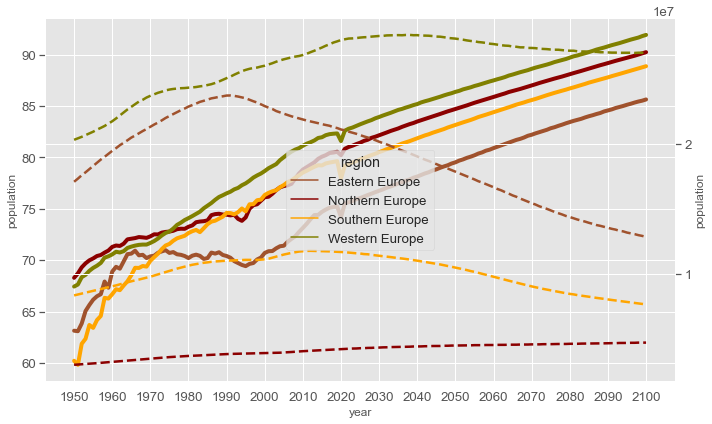

In [1774]:
#cp = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#cp = sns.color_palette("ch:s=-.2,r=.6")
#sns.set_palette(cp)
g = sns.FacetGrid(df_grouped[(df_grouped['year'] >= '1950') & (df_grouped['year'] <= '2100') & (df_grouped['continent'] == 'Europe')], height=6, aspect=10/6, legend_out=True)
g.map(sns.lineplot, 'year', 'life_exp', hue=df_grouped[df_grouped['continent'] == 'Europe']['region'], ci=None, linewidth=4,)
g.map(sns_twin_x, 'year', 'population', hue=df_grouped[df_grouped['continent'] == 'Europe']['region'], ci=None, linewidth=2.5, linestyle='--')

#get axes object
ax = g.axes
#set xticks to 5 year interval
ax[0,0].xaxis.set_major_locator(mdates.YearLocator(10))

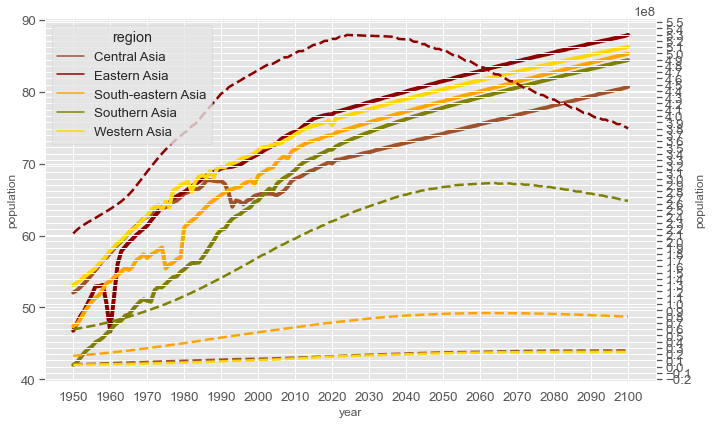

In [1781]:
#cp = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#cp = sns.color_palette("ch:s=-.2,r=.6")
#sns.set_palette(cp)
g = sns.FacetGrid(df_grouped[(df_grouped['year'] >= '1950') & (df_grouped['year'] <= '2100') & (df_grouped['continent'] == 'Asia')], height=6, aspect=10/6, legend_out=True)
g.map(sns.lineplot, 'year', 'life_exp', hue=df_grouped[df_grouped['continent'] == 'Asia']['region'], ci=None, linewidth=4,)
g.map(sns_twin_x, 'year', 'population', hue=df_grouped[df_grouped['continent'] == 'Asia']['region'], ci=None, linewidth=2.5, linestyle='--')

#get axes object
ax = g.axes
#set xticks to 5 year interval
ax[0,0].xaxis.set_major_locator(mdates.YearLocator(10))

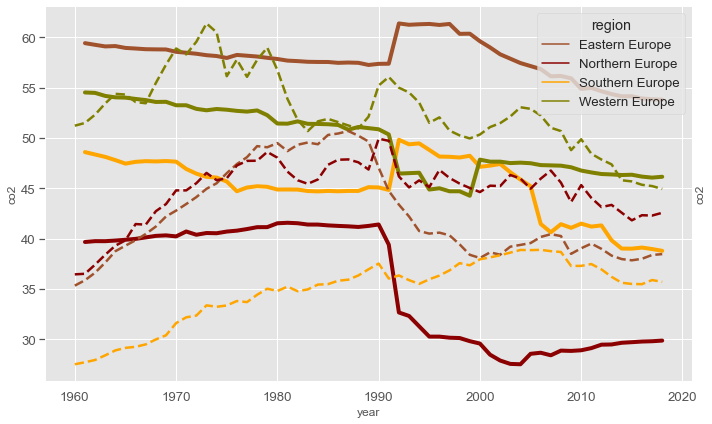

In [1780]:
#cp = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#cp = sns.color_palette("ch:s=-.2,r=.6")
#sns.set_palette(cp)
g = sns.FacetGrid(df_grouped[(df_grouped['year'] >= '1960') & (df_grouped['year'] <= '2018') & (df_grouped['continent'] == 'Europe')], height=6, aspect=10/6, legend_out=True)
g.map(sns.lineplot, 'year', 'agr_area', hue=df_grouped[df_grouped['continent'] == 'Europe']['region'], ci=None, linewidth=4,)
g.map(sns_twin_x, 'year', 'co2', hue=df_grouped[df_grouped['continent'] == 'Europe']['region'], ci=None, linewidth=2.5, linestyle='--')

#get axes object
ax = g.axes
#set xticks to 5 year interval
ax[0,0].xaxis.set_major_locator(mdates.YearLocator(10))

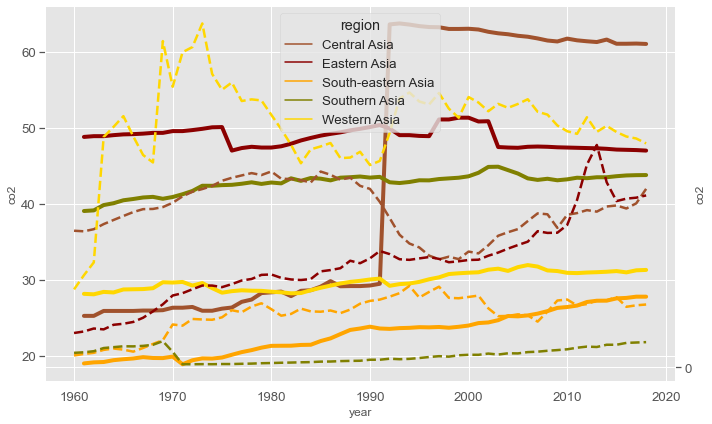

In [1782]:
#cp = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#cp = sns.color_palette("ch:s=-.2,r=.6")
#sns.set_palette(cp)
g = sns.FacetGrid(df_grouped[(df_grouped['year'] >= '1960') & (df_grouped['year'] <= '2018') & (df_grouped['continent'] == 'Asia')], height=6, aspect=10/6, legend_out=True)
g.map(sns.lineplot, 'year', 'agr_area', hue=df_grouped[df_grouped['continent'] == 'Asia']['region'], ci=None, linewidth=4,)
g.map(sns_twin_x, 'year', 'co2', hue=df_grouped[df_grouped['continent'] == 'Asia']['region'], ci=None, linewidth=2.5, linestyle='--')

#get axes object
ax = g.axes
#set xticks to 5 year interval
ax[0,0].xaxis.set_major_locator(mdates.YearLocator(10))

In [1715]:
#g = sns.relplot(x="agr_area", y="co2", hue='continent', size='population', kind="scatter", \
                #data=co2_ov[(co2_ov['year'] >= '1965') & (co2_ov['year'] < '1981')], height=4, aspect=6/4, \
                #ci=None, facet_kws={'legend_out': True}, sizes=(20,300))

#sns.scatterplot(data=df_merged_resampled, y=df_merged_resampled.index.get_level_values('year'), x='co2', size="population", hue=df_merged_resampled.index.get_level_values('country') ,legend=False, sizes=(20, 2000))

### Population and life expectancy

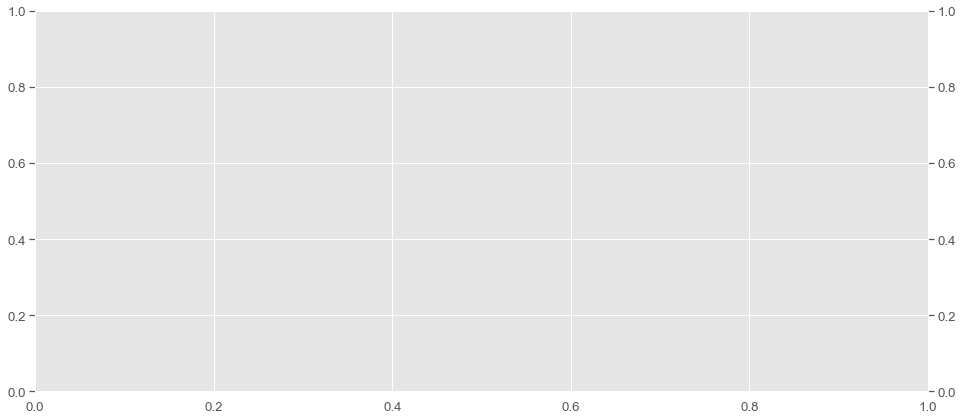

In [1716]:
fig,ax1 = plt.subplots(figsize=(16,7))

ax2 = ax1.twinx()

In [1717]:
#hist or boxplot: mean of each year for all countries
#barplot with proportions of each country/continent

In [1718]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [1719]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<a id='appendix'></a>
## Appendix

### Resources used:
- online documentation for pandas, matplotlib, seaborn, numpy
- personal notes from taking other courses
- stackoverflow.com
- geeksforgeeks.org
- stackabuse.com
- gapminder.org
- w3schoolos.com
- towardsdatescience.com
- statisticstimes.com
- datacamp.com
- worldometers.info
- docs.python.org
- python-graph-gallery.com
- dataforeverybody.com

<a id='cf'></a>
### Helper functions

In [1720]:
# %load helpers.py
import numpy
import matplotlib.pyplot as plt
import pandas as pd

def get_num_countries(datasets, names):
    for i, val in enumerate(datasets):
        print('Number of countries in {}: {}'.format(names[i], val.country.nunique()))

def get_missing(data):
    #save num of missing values in new column 
    data['missing'] = data.iloc[:, 1:].apply(lambda x: x.isna().sum() if numpy.any(x.isna()) else 0, axis=1)
    #filter for values < 0 
    filtered = data['missing'][data['missing'] != 0]
    ctries = data['country'][data['missing'] != 0]
    return (filtered, ctries)

def plot_missing(data, x_values, x_labels, set_name):
    #plot bar chart
    x_values.plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6))
    plt.xticks(numpy.arange(0, len(x_values)), x_labels)
    #label the axes and set title 
    plt.xlabel('Country')
    plt.ylabel('Number of missing values')
    plt.title(('Missing values per country in {} data').format(set_name), fontsize=13, fontweight='bold')
    
def cut_suffix_tonumber(x):
    #check last char, cut last char, convert to float, 
    #multiply depending if last char is 'M', 'k' or 'B'
    #if no letter-suffix, just convert to float 
    if x[-1:] == 'M':
        return pd.to_numeric(x[:-1]) * 1000000
    elif x[-1:] == 'k':
        return pd.to_numeric(x[:-1]) * 1000
    elif x[-1:] == 'B':
        return pd.to_numeric(x[:-1]) * 1000000000
    else:
        return pd.to_numeric(x[:-1])